# Cone Search
### Ken Smith
Simple cone search.  Given RA, Dec, radius and type of parameter we want do a cone search.  Plot lightcurves of all the objects we get.

Demonstrates usage of:
* /cone/
* /objects/

The query joins the objects, watchlists and areas table.

### Python (3 only) requirements - pip install
lasair

### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-iris.roe.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID. 

```bash
curl --data "username=tutorial&password=***********" https://lasair-iris.roe.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"acf14c2788ec5d7abb351f06e9ce2624a810b2ab"}
```
We can use this token temporarily, but note that it will be disabled after the workshop!

In [5]:
from astropy.time import Time
import matplotlib.pyplot as plt

from lasair import LasairError, lasair_client as lasair

token = "acf14c2788ec5d7abb351f06e9ce2624a810b2ab"

### Do the cone search
Get all, nearest or just count. Note that objects are returned in ascending order of separation.

In [6]:
ra=132.209445
dec=29.870510

# Huge search radius of 16.66 arcmins - the maximum!
radius = 1000.0

L = lasair(token)

try:
    result = L.cone(ra, dec, radius, requestType='count')
except LasairError as e:
    print(e)

print(result['count'])

try:
    result = L.cone(ra, dec, radius, requestType='nearest')
except LasairError as e:
    print(e)

print(result['object'], "%.2f" % result['separation'])
print()

requestType = 'all'

try:
    result = L.cone(ra, dec, radius, requestType='all')
except LasairError as e:
    print(e)

for obj in result:
    print(obj['object'], "%.2f" % obj['separation'])

11
ZTF21aapyiku 0.01

ZTF21aapyiku 0.01
ZTF18aaadcxy 148.33
ZTF17aacvvqb 148.98
ZTF19acyxnce 149.07
ZTF21aacrcxj 149.08
ZTF19aczjpso 149.38
ZTF18acexyml 149.74
ZTF20acpwyqm 171.10
ZTF21aafgnth 248.93
ZTF18acmrqfh 296.74
ZTF18aaaddej 641.95


### Grab the lightcurves using the objects API
(This is just optional!!)

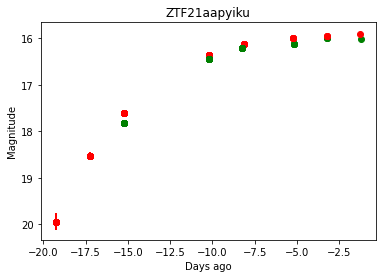

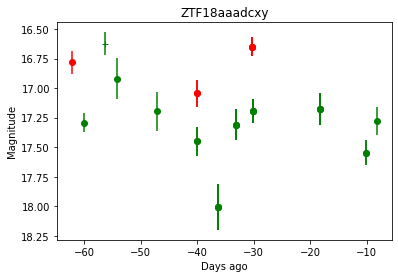

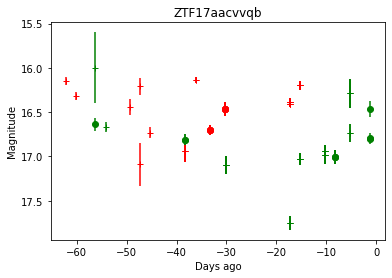

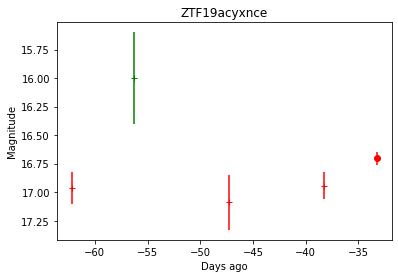

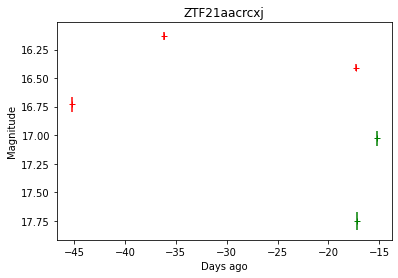

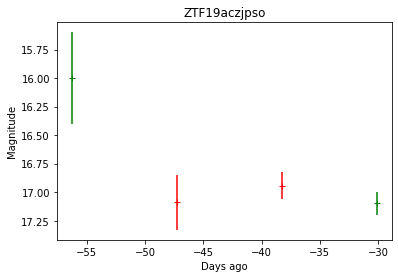

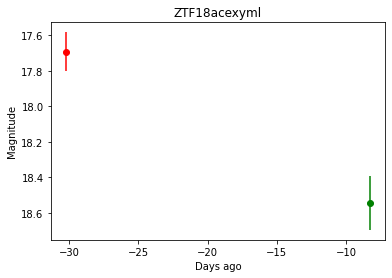

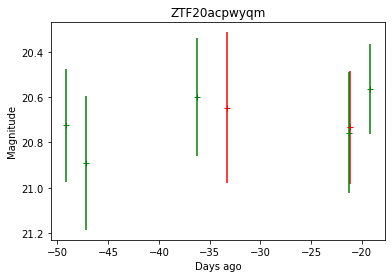

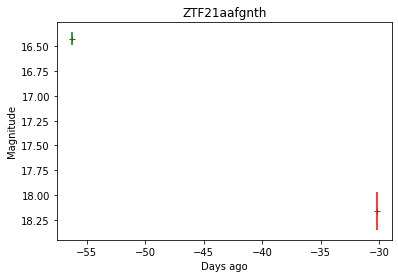

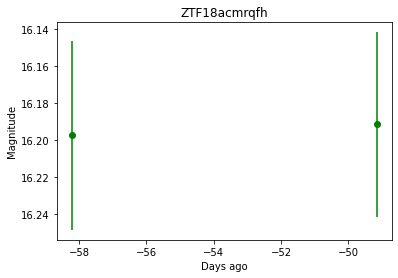

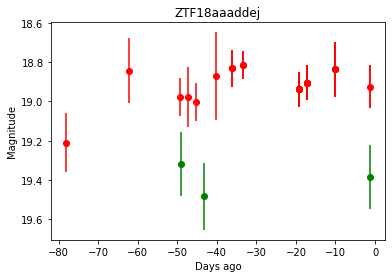

In [7]:
objectList = [row['object'] for row in result]
response = L.objects(objectList)

# create a dictionary of lightcurves

lcsDict = {}
for obj in response:    
    lcsDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'g',2:'r'}

now = Time.now().jd

for obj in response:
    plt.figure()
    plt.subplot(111)
    for i in lcsDict[obj['objectId']]['candidates']:
        if 'isdiffpos' in i:
            if i['isdiffpos']=='t':
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='o',color=cols[i['fid']])
            else:
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='+',color=cols[i['fid']])


    plt.gca().invert_yaxis()
    plt.ylabel('Magnitude')
    plt.xlabel('Days ago')
    plt.title(obj['objectId'])
